<a href="https://colab.research.google.com/github/georginobaltazar/TP-547---Trabalhos/blob/main/Trabalho%20Final%20I/SimulTrabalhoFinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final I

Estudante: Georgino da Silva Baltazar

# Artigo: Performance Enhancement in Full-Duplex AF Relay System through Smart Antenna Allocation

Referencia: [1] M. H. N. Shaikh, V. A. Bohara and A. Srivastava, "Performance Enhancement in Full-Duplex AF Relay System through Smart Antenna Allocation," 2020 IEEE 3rd 5G World Forum (5GWF), Bangalore, India, 2020, pp. 303-308, doi: 10.1109/5GWF49715.2020.9221287.

# Este código reproduz a figura 3 do Artigo usado para o trabalho Final 1

In [3]:
# Importando as bibliotecas necessárias
import numpy as np  # Usado para operações matemáticas e matriciais
import matplotlib.pyplot as plt  # Usado para plotar gráficos

# Definição de parâmetros fixos do sistema
NR = 20  # Número de antenas no relay
PdB_full = np.linspace(0, 30, 200)  # Gera 200 pontos de potência de 0 a 30 dB para a curva analítica
PdB_sim = np.linspace(0, 30, 11)  # Gera 11 pontos de potência de 0 a 30 dB para simulações
sigma2 = 10**(-20/10)  # Conversão da potência do ruído de dB para escala linear
kappa = 0.01  # Fator de interferência residual própria (RSI)
rho = 0.2  # Fator de localização relativa do relay no caminho do sinal
nu = 2  # Expoente de perda de caminho (path-loss exponent)

# Listas para armazenar os resultados de eficiência espectral analítica
SE_optimal_analytical = []
SE_equal_analytical = []

# Calculando eficiência espectral analítica para cada valor de potência em PdB_full
for P_dB in PdB_full:
    Ps = Pr = 10**(P_dB/10)  # Converte a potência de dB para escala linear
    a1 = NR * Ps * (1 - rho)**(-nu)  # Cálculo do termo a1 baseado na potência e localização
    a2 = NR * Pr * rho**(-nu)  # Cálculo do termo a2
    b = kappa * Pr  # Calcula a variância do RSI
    c1 = a1 - 2*a2*b - a2 + b  # Coeficiente para o cálculo de η ótimo
    c2 = a1 + b + 1  # Coeficiente para o cálculo de η ótimo
    eta_optimal = (c2 - np.sqrt(c2**2 - 4 * c1 * c2)) / (2 * c1)  # Solução da equação quadrática para encontrar η ótimo
    sinr_optimal_analytical = ((1-eta_optimal)*a1*eta_optimal*a2) / ((1-eta_optimal)*a1*sigma2 + (eta_optimal*a2 + sigma2)*(b + sigma2))
    sinr_equal_analytical = ((1-0.5)*a1*0.5*a2) / ((1-0.5)*a1*sigma2 + (0.5*a2 + sigma2)*(b + sigma2))
    SE_optimal_analytical.append(np.log2(1 + sinr_optimal_analytical))
    SE_equal_analytical.append(np.log2(1 + sinr_equal_analytical))

# Simulação de Monte Carlo
SE_optimal_sim = []
SE_equal_sim = []

# Executando simulações para cada valor de potência em PdB_sim
for P_dB in PdB_sim:
    Ps = Pr = 10**(P_dB/10)  # Conversão da potência de dB para escala linear
    sinr_optimal_samples = []
    sinr_equal_samples = []
    for _ in range(100000):  # 100000 simulações Monte Carlo por ponto de potência
        h_SR = np.sqrt(0.5) * (np.random.randn() + 1j * np.random.randn())  # Canal de fading Rayleigh da fonte para o relay
        h_RD = np.sqrt(0.5) * (np.random.randn() + 1j * np.random.randn())  # Canal de fading Rayleigh do relay para o destino
        a1 = NR * Ps * (1 - rho)**(-nu)  # Recalcula a1 para a simulação
        a2 = NR * Pr * rho**(-nu)  # Recalcula a2 para a simulação
        b = kappa * Pr  # Recalcula b para a simulação
        c1 = a1 - 2*a2*b - a2 + b  # Recalcula c1 para a simulação
        c2 = a1 + b + 1  # Recalcula c2 para a simulação
        eta_optimal = (c2 - np.sqrt(c2**2 - 4 * c1 * c2)) / (2 * c1)  # Recalcula η ótimo para a simulação
        sinr_optimal = ((1-eta_optimal)*a1*eta_optimal*a2) / ((1-eta_optimal)*a1*sigma2 + (eta_optimal*a2 + sigma2)*(b + sigma2))
        sinr_equal = ((1-0.5)*a1*0.5*a2) / ((1-0.5)*a1*sigma2 + (0.5*a2 + sigma2)*(b + sigma2))
        sinr_optimal_samples.append(sinr_optimal)
        sinr_equal_samples.append(sinr_equal)
    SE_optimal_sim.append(np.log2(1 + np.mean(sinr_optimal_samples)))
    SE_equal_sim.append(np.log2(1 + np.mean(sinr_equal_samples)))


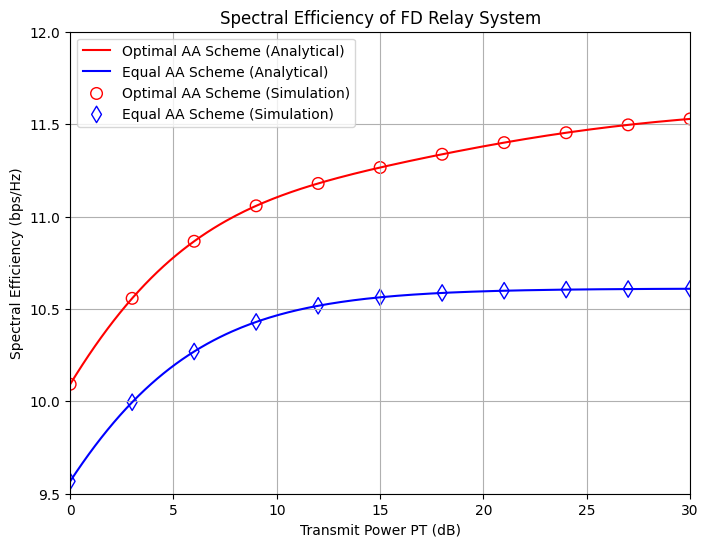

In [4]:
# Plotagem dos resultados
plt.figure(figsize=(8, 6))
plt.plot(PdB_full, SE_optimal_analytical, label='Optimal AA Scheme (Analytical)', linestyle='-', color='red')
plt.plot(PdB_full, SE_equal_analytical, label='Equal AA Scheme (Analytical)', linestyle='-', color='blue')
plt.scatter(PdB_sim, SE_optimal_sim, color='red', s=70, label='Optimal AA Scheme (Simulation)', marker='o', facecolors='none', edgecolors='red')
plt.scatter(PdB_sim, SE_equal_sim, color='blue', s=70, label='Equal AA Scheme (Simulation)', marker='d', facecolors='none', edgecolors='blue')
plt.title('Spectral Efficiency of FD Relay System')
plt.xlabel('Transmit Power PT (dB)')
plt.ylabel('Spectral Efficiency (bps/Hz)')
plt.ylim(9.5, 12)
plt.xlim(0, 30)
plt.legend()
plt.grid(True)
plt.show()